In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# local modules
import preprocessing as pp

# reload changes in modules automatically
%reload_ext autoreload
%autoreload 2

In [4]:
messages = pp.preprocess()
pp.TICKETS.head(4)

,ID,Beschreibung,Kategorie ID,Kategorietext,Unterkategorie ID,Unterkategorietext,Status,Angelegt Am,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Nr. Nachrichten,Erste Antwort,Letzte Antwort
0,2000000060,,ZSD_SR_AA,Allgemeine Anfragen,ZSD_SR_AA_SON,Sonstiges,E0008 Quittiert,2015.11.25\t18:35:21,H2451TK1,2015.12.18\t02:00:47,H2851RM1,H2451,H2451TK1,0000000046,H2851RM1,5,2015.11.25\t19:35:19,2015.11.26\t14:26:08
1,2000000070,,ZSD_SR_BO,SAP Netweaver Business Objects,SR_ZSD_BO_FP,Fallstudienproblem,E0008 Quittiert,2015.11.26\t13:49:29,H2741CR1,2016.03.08\t09:59:56,H2851AS9,H2741,H2741CR1,0000000046,NaN,5,2015.11.26\t14:49:16,2015.11.26\t16:08:45
2,2000000071,,ZSD_SR_BO,SAP Netweaver Business Objects,SR_ZSD_BO_FP,Fallstudienproblem,E0008 Quittiert,2015.11.26\t14:37:47,H2741CR1,2016.05.31\t16:00:40,BORYS,H2741,H2741CR1,0000000047,H2851LP2,5,2015.11.26\t15:37:34,2016.05.31\t18:00:40
3,2000000073,,ZSD_SR_BYD,SAP Business by Design,ZSD_SR_BYD_PRM,Passwortrücksetzung für Masteruser,E0008 Quittiert,2015.11.26\t17:40:10,H2851GB2,2016.05.31\t16:00:40,BORYS,H2851,H2851GB2,0000000047,H2851GB2,1,2016.05.31\t18:00:40,2016.05.31\t18:00:40


## Assigned Tickets per Support Operator

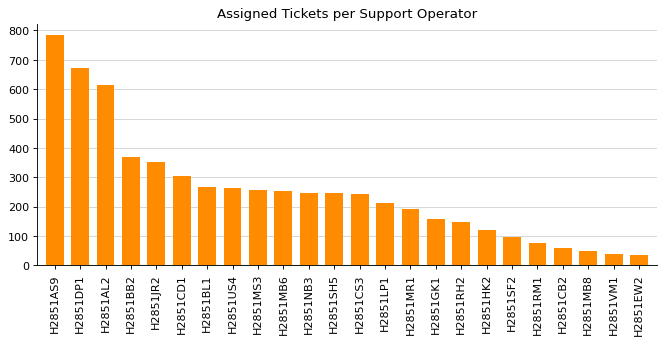

In [5]:
data = messages['operator'].value_counts().reset_index()

fig = plt.figure(figsize=(10, 4), dpi=80)
ax = plt.subplot(111)

ax.grid(axis='y', zorder=0, color='lightgray')
ax.bar(data['index'], data['operator'], zorder=10, color='darkorange', width=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([-0.7, len(data)-0.3])
ax.set_title('Assigned Tickets per Support Operator')

plt.xticks(rotation=90)
plt.show()

## Number of Tickets per Category

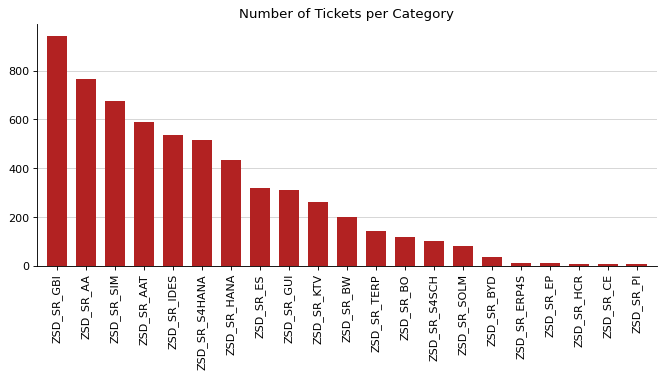

In [181]:
data = messages['category'].value_counts().reset_index()

fig = plt.figure(figsize=(10, 4), dpi=80)
ax = plt.subplot(111)

ax.grid(axis='y', zorder=0, color='lightgray')
ax.bar(data['index'], data['category'], zorder=10, color='firebrick', width=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([-0.7, len(data)-0.3])
ax.set_title('Number of Tickets per Category')

plt.xticks(rotation=90)
plt.show()

## Tickets Created per Week Over Time

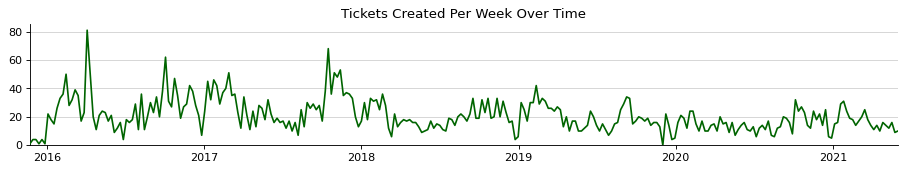

In [182]:
def add_zero_week_datapoints(series):
    dates = []
    date = min(series.index)
    while date < max(series.index):
        if date not in series.index:
            dates.append(date)
        date += datetime.timedelta(weeks=1)
    dates = pd.DataFrame({'timestamp': dates, 'count': [0]*len(dates)}).set_index('timestamp')
    return series.append(dates).sort_index()

data = messages[['operator', 'timestamp']].copy()
data['timestamp'] = data['timestamp'].apply(lambda x: x.date() - datetime.timedelta(days=x.weekday()))

e = data.groupby('timestamp')['timestamp'].agg(['count'])
e = add_zero_week_datapoints(e)

fig = plt.figure(figsize=(14, 2), dpi=80)
ax = plt.subplot(111)

ax.grid(axis='y', zorder=0, color='lightgray')
ax.plot(e, zorder=10, color='darkgreen')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0, None])
ax.set_xlim([min(data['timestamp']), max(data['timestamp'])])
ax.set_title('Tickets Created Per Week Over Time')

plt.show()

## Tickets Handled By Specific Operators Over Time

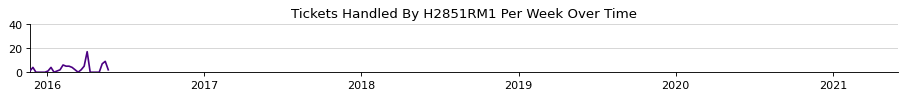

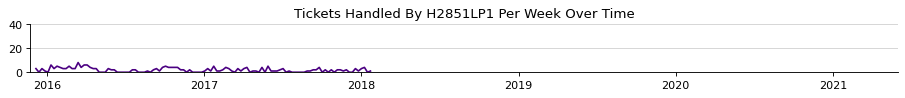

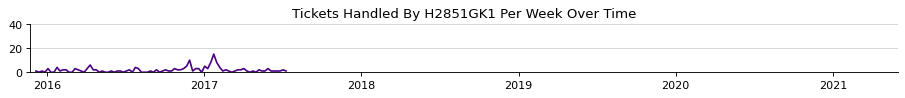

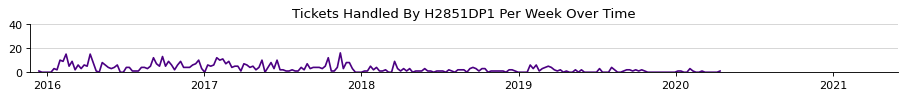

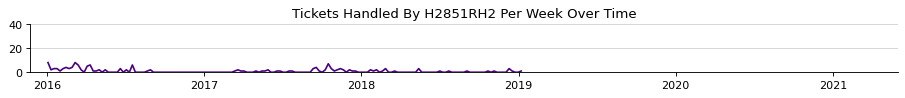

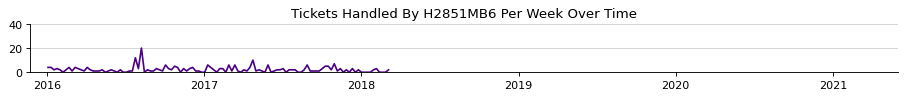

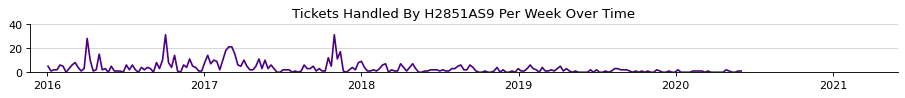

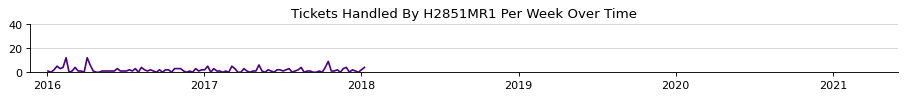

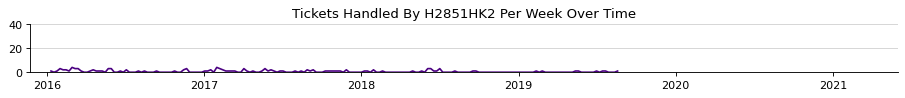

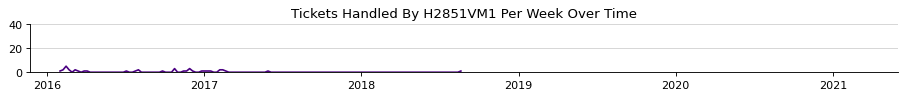

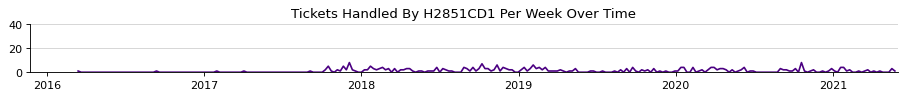

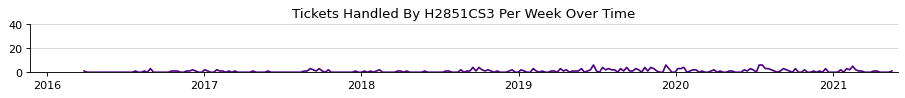

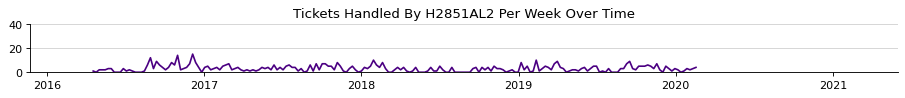

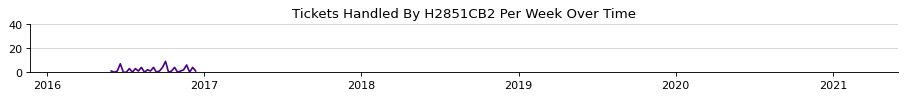

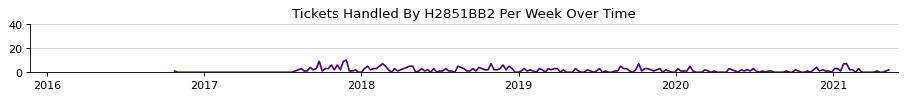

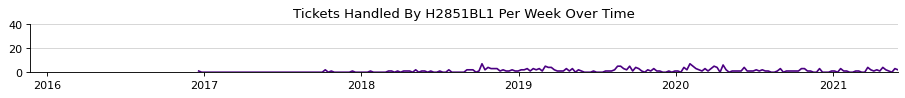

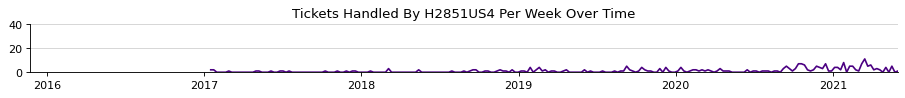

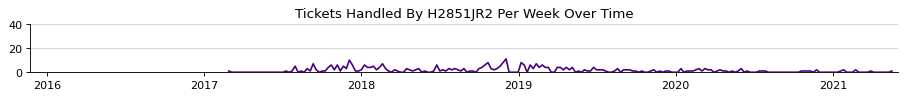

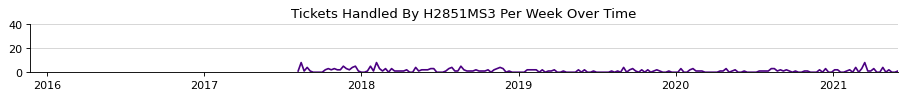

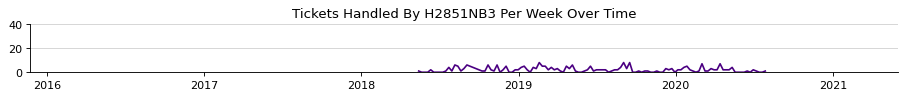

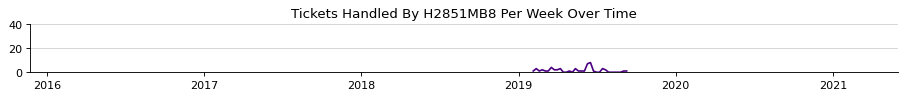

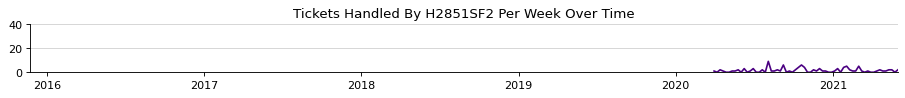

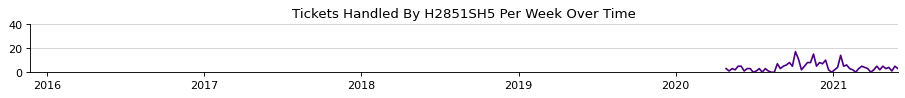

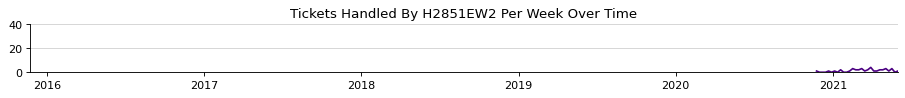

In [183]:
for operator in data['operator'].unique():
    # prepare data fill weeks without activity with zeros
    e = data[data['operator'] == operator].groupby('timestamp')['timestamp'].agg(['count'])
    e = add_zero_week_datapoints(e)
    # initialize matplotlib figure
    fig = plt.figure(figsize=(14, 0.8), dpi=80)
    ax = plt.subplot(111)
    # set style and plot data
    ax.grid(axis='y', zorder=0, color='lightgray')
    ax.plot(e, zorder=10, color='indigo')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 40])
    ax.set_xlim([min(data['timestamp']), max(data['timestamp'])])
    ax.set_title(f'Tickets Handled By {operator} Per Week Over Time')
    plt.show()